In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [2]:
data=pd.read_csv('oec.csv', sep=",")

In [3]:
#размер датасета
data.shape

(3584, 25)

In [4]:
data.head()

,PlanetIdentifier,TypeFlag,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,Eccentricity,PeriastronDeg,LongitudeDeg,AscendingNodeDeg,...,LastUpdated,RightAscension,Declination,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,HostStarAgeGyr,ListsPlanetIsOn
0,HD 143761 b,0,1.0450,NaN,39.845800,0.2196,0.037,270.6,NaN,NaN,...,16/07/11,16 01 03,+33 18 13,17.236,0.889,1.362,-0.31,5627.0,NaN,Confirmed planets
1,HD 143761 c,0,0.0790,NaN,102.540000,0.4123,0.050,190.0,NaN,NaN,...,16/07/11,16 01 03,+33 18 13,17.236,0.889,1.362,-0.31,5627.0,NaN,Confirmed planets
2,KOI-1843.03,0,0.0014,0.054,0.176891,0.0048,NaN,NaN,NaN,NaN,...,13/07/15,19 00 03.14,+40 13 14.7,NaN,0.460,0.450,0.00,3584.0,NaN,Controversial
3,KOI-1843.01,0,NaN,0.114,4.194525,0.0390,NaN,NaN,NaN,NaN,...,NaN,19 00 03.14,+40 13 14.7,NaN,0.460,0.450,0.00,3584.0,NaN,Controversial
4,KOI-1843.02,0,NaN,0.071,6.356006,0.0520,NaN,NaN,NaN,NaN,...,NaN,19 00 03.14,+40 13 14.7,NaN,0.460,0.450,0.00,3584.0,NaN,Controversial


In [5]:
# Колонки с пропусками
hcols_with_na = [c for c in data.columns if data[c].isnull().sum() > 0]
hcols_with_na

['PlanetaryMassJpt',
 'RadiusJpt',
 'PeriodDays',
 'SemiMajorAxisAU',
 'Eccentricity',
 'PeriastronDeg',
 'LongitudeDeg',
 'AscendingNodeDeg',
 'InclinationDeg',
 'SurfaceTempK',
 'AgeGyr',
 'DiscoveryMethod',
 'DiscoveryYear',
 'LastUpdated',
 'RightAscension',
 'Declination',
 'DistFromSunParsec',
 'HostStarMassSlrMass',
 'HostStarRadiusSlrRad',
 'HostStarMetallicity',
 'HostStarTempK',
 'HostStarAgeGyr']

In [6]:
# Количество пропусков
[(c, data[c].isnull().sum()) for c in hcols_with_na]

[('PlanetaryMassJpt', 2271),
 ('RadiusJpt', 810),
 ('PeriodDays', 99),
 ('SemiMajorAxisAU', 2178),
 ('Eccentricity', 2476),
 ('PeriastronDeg', 3256),
 ('LongitudeDeg', 3541),
 ('AscendingNodeDeg', 3538),
 ('InclinationDeg', 2919),
 ('SurfaceTempK', 2843),
 ('AgeGyr', 3582),
 ('DiscoveryMethod', 63),
 ('DiscoveryYear', 10),
 ('LastUpdated', 8),
 ('RightAscension', 10),
 ('Declination', 10),
 ('DistFromSunParsec', 1451),
 ('HostStarMassSlrMass', 168),
 ('HostStarRadiusSlrRad', 321),
 ('HostStarMetallicity', 1075),
 ('HostStarTempK', 129),
 ('HostStarAgeGyr', 3067)]

In [7]:
# Доля (процент) пропусков
[(c, data[c].isnull().mean()) for c in hcols_with_na]

[('PlanetaryMassJpt', 0.6336495535714286),
 ('RadiusJpt', 0.22600446428571427),
 ('PeriodDays', 0.027622767857142856),
 ('SemiMajorAxisAU', 0.6077008928571429),
 ('Eccentricity', 0.6908482142857143),
 ('PeriastronDeg', 0.9084821428571429),
 ('LongitudeDeg', 0.9880022321428571),
 ('AscendingNodeDeg', 0.9871651785714286),
 ('InclinationDeg', 0.814453125),
 ('SurfaceTempK', 0.7932477678571429),
 ('AgeGyr', 0.9994419642857143),
 ('DiscoveryMethod', 0.017578125),
 ('DiscoveryYear', 0.0027901785714285715),
 ('LastUpdated', 0.002232142857142857),
 ('RightAscension', 0.0027901785714285715),
 ('Declination', 0.0027901785714285715),
 ('DistFromSunParsec', 0.4048549107142857),
 ('HostStarMassSlrMass', 0.046875),
 ('HostStarRadiusSlrRad', 0.08956473214285714),
 ('HostStarMetallicity', 0.29994419642857145),
 ('HostStarTempK', 0.03599330357142857),
 ('HostStarAgeGyr', 0.8557477678571429)]

In [8]:
#удаление колонок, где пропуски преобладают
data=data.drop(['Eccentricity','PlanetaryMassJpt','AgeGyr','SemiMajorAxisAU','LongitudeDeg','LongitudeDeg', 'PeriastronDeg','SurfaceTempK', 'AscendingNodeDeg', 'HostStarAgeGyr','InclinationDeg'], axis='columns')

In [9]:
data.isnull().sum()

PlanetIdentifier           0
TypeFlag                   0
RadiusJpt                810
PeriodDays                99
DiscoveryMethod           63
DiscoveryYear             10
LastUpdated                8
RightAscension            10
Declination               10
DistFromSunParsec       1451
HostStarMassSlrMass      168
HostStarRadiusSlrRad     321
HostStarMetallicity     1075
HostStarTempK            129
ListsPlanetIsOn            0
dtype: int64

In [10]:
data.dtypes

PlanetIdentifier         object
TypeFlag                  int64
RadiusJpt               float64
PeriodDays              float64
DiscoveryMethod          object
DiscoveryYear           float64
LastUpdated              object
RightAscension           object
Declination              object
DistFromSunParsec       float64
HostStarMassSlrMass     float64
HostStarRadiusSlrRad    float64
HostStarMetallicity     float64
HostStarTempK           float64
ListsPlanetIsOn          object
dtype: object

Устранение пропусков в данных

In [11]:
from sklearn.impute import SimpleImputer

In [12]:
#Удаление строк, содержащих пустые значения
#Удаление строк, содержащих пустые значения
data_new2=data.dropna(axis=0, how='any')
(data.shape, data_new2.shape)

((3584, 15), (475, 15))

Категориальные признаки

In [13]:
#заполнение наиболее частыми значениями
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data[['LastUpdated','RightAscension','Declination']] = imp.fit_transform(data[['LastUpdated', 'RightAscension','Declination']])

In [14]:
#Введение отдельного значения категории для пропущенных значений
imp2 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='no data')
data[['DiscoveryMethod']] = imp2.fit_transform(data[['DiscoveryMethod']])

In [21]:
data['DiscoveryMethod'].unique()

array(['RV', 'transit', 'microlensing', 'no data', 'imaging', 'timing'],
      dtype=object)

Числовые признаки

In [15]:
#Заполнение средним значением
 data.loc[:, 'RadiusJpt']=data.loc[:, 'RadiusJpt'].fillna(data['RadiusJpt'].mean())

In [16]:
data.loc[:, 'DiscoveryYear']=data.loc[:, 'DiscoveryYear'].fillna(data['DiscoveryYear'].mean())

In [17]:
data.loc[:, 'HostStarMetallicity']=data.loc[:, 'HostStarMetallicity'].fillna(data['HostStarMetallicity'].mean())

In [18]:
data.loc[:, 'HostStarRadiusSlrRad']=data.loc[:, 'HostStarRadiusSlrRad'].fillna(data['HostStarRadiusSlrRad'].mean())

Кодирование категориальных признаков

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(data.PlanetIdentifier )
data['PlanetIdentifier']=le.transform(data.PlanetIdentifier )

In [20]:
#Count encoding
from category_encoders.count import CountEncoder as ce_CountEncoder

In [22]:
ce_CountEncoder1 = ce_CountEncoder()
data['DiscoveryMethod'] = ce_CountEncoder1.fit_transform(data['DiscoveryMethod'])

In [23]:
data['DiscoveryMethod'].unique()

array([ 692, 2712,   40,   63,   52,   25], dtype=int64)

In [24]:
le=LabelEncoder()
le.fit(data.LastUpdated )
data['LastUpdated']=le.transform(data.LastUpdated )

In [25]:
le=LabelEncoder()
le.fit(data.RightAscension)
data['RightAscension']=le.transform(data.RightAscension)

In [26]:
le=LabelEncoder()
le.fit(data.Declination)
data['Declination']=le.transform(data.Declination)

In [27]:
le=LabelEncoder()
le.fit(data.ListsPlanetIsOn)
data['ListsPlanetIsOn']=le.transform(data.ListsPlanetIsOn)

In [28]:
data.dtypes

PlanetIdentifier          int32
TypeFlag                  int64
RadiusJpt               float64
PeriodDays              float64
DiscoveryMethod           int64
DiscoveryYear           float64
LastUpdated               int32
RightAscension            int32
Declination               int32
DistFromSunParsec       float64
HostStarMassSlrMass     float64
HostStarRadiusSlrRad    float64
HostStarMetallicity     float64
HostStarTempK           float64
ListsPlanetIsOn           int32
dtype: object

In [30]:
from sklearn.impute import KNNImputer
knnimputer = KNNImputer(
    n_neighbors=5, 
    weights='distance', 
    metric='nan_euclidean', 
    add_indicator=False, 
)
knnimpute_hdata_imputed_temp = knnimputer.fit_transform(data)
data = pd.DataFrame(knnimpute_hdata_imputed_temp, columns=data.columns)
data.head()

,PlanetIdentifier,TypeFlag,RadiusJpt,PeriodDays,DiscoveryMethod,DiscoveryYear,LastUpdated,RightAscension,Declination,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,ListsPlanetIsOn
0,468.0,0.0,0.37119,39.845800,692.0,2016.000000,454.0,608.0,274.0,17.236000,0.889,1.362,-0.31,5627.0,0.0
1,469.0,0.0,0.37119,102.540000,692.0,2016.000000,454.0,608.0,274.0,17.236000,0.889,1.362,-0.31,5627.0,0.0
2,948.0,0.0,0.05400,0.176891,2712.0,2012.000000,239.0,972.0,549.0,176.802885,0.460,0.450,0.00,3584.0,6.0
3,946.0,0.0,0.11400,4.194525,2712.0,2013.300504,440.0,972.0,549.0,175.005239,0.460,0.450,0.00,3584.0,6.0
4,947.0,0.0,0.07100,6.356006,2712.0,2013.300504,440.0,972.0,549.0,175.032000,0.460,0.450,0.00,3584.0,6.0


In [31]:
data.isnull().sum()

PlanetIdentifier        0
TypeFlag                0
RadiusJpt               0
PeriodDays              0
DiscoveryMethod         0
DiscoveryYear           0
LastUpdated             0
RightAscension          0
Declination             0
DistFromSunParsec       0
HostStarMassSlrMass     0
HostStarRadiusSlrRad    0
HostStarMetallicity     0
HostStarTempK           0
ListsPlanetIsOn         0
dtype: int64

Нормализация числовых признаков

In [32]:
import scipy.stats as stats
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    # гистограмма
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

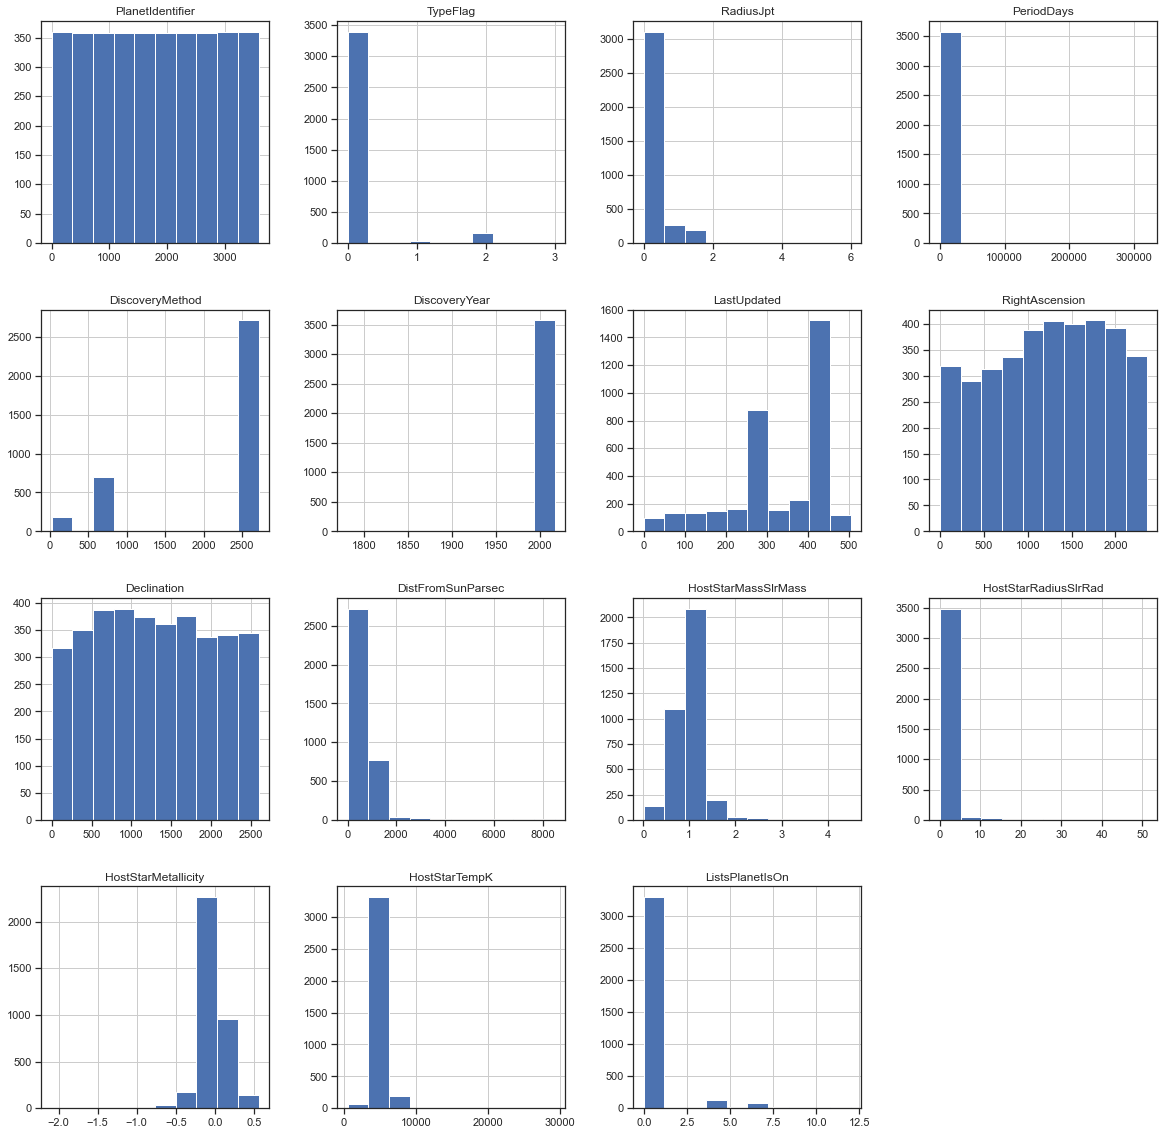

In [33]:
data.hist(figsize=(20,20))
plt.show()

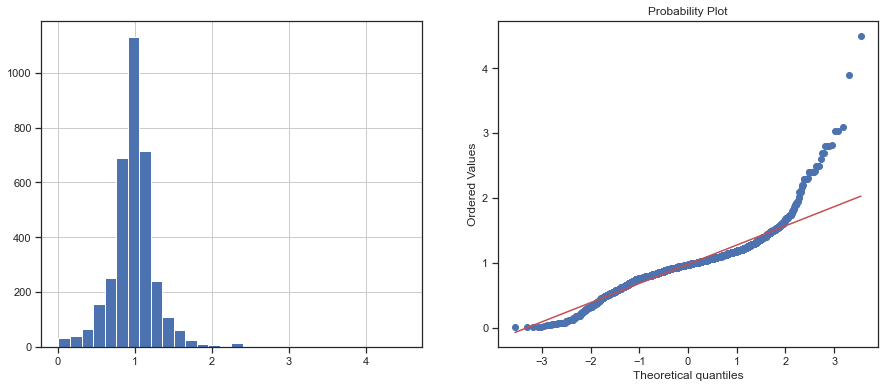

In [34]:
#Исходное распределение
diagnostic_plots(data, 'HostStarMassSlrMass')

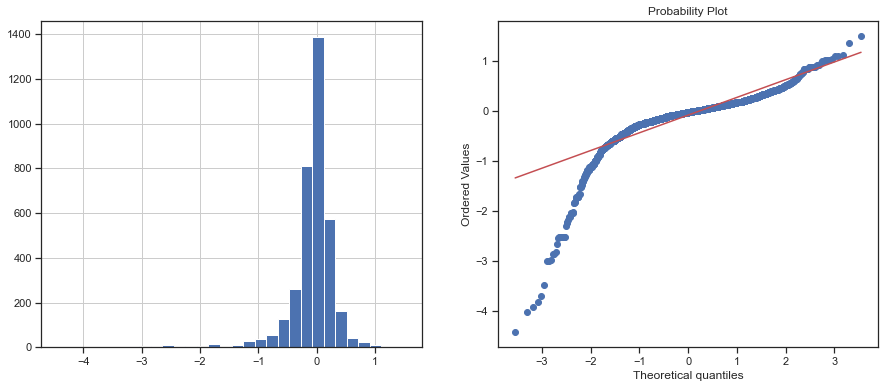

In [35]:
#Логарифмическое преобразование
data['HostStarMassSlrMass_log'] = np.log(data['HostStarMassSlrMass'])
diagnostic_plots(data, 'HostStarMassSlrMass_log')

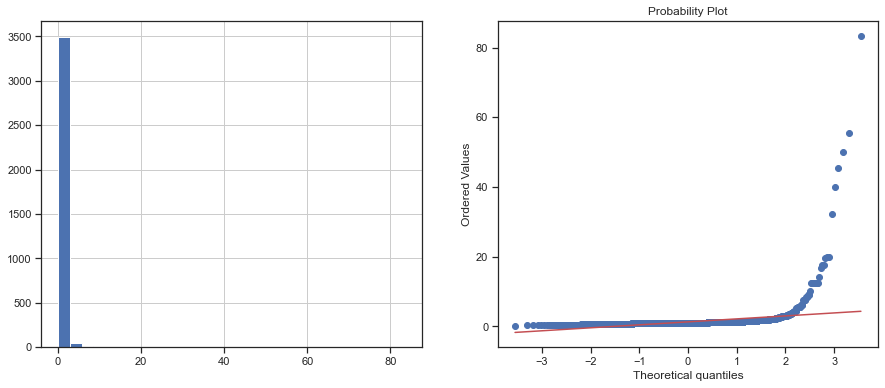

In [36]:
#Обратное преобразование
data['HostStarMassSlrMass_reciprocal'] = 1 / (data['HostStarMassSlrMass']) 
diagnostic_plots(data, 'HostStarMassSlrMass_reciprocal')

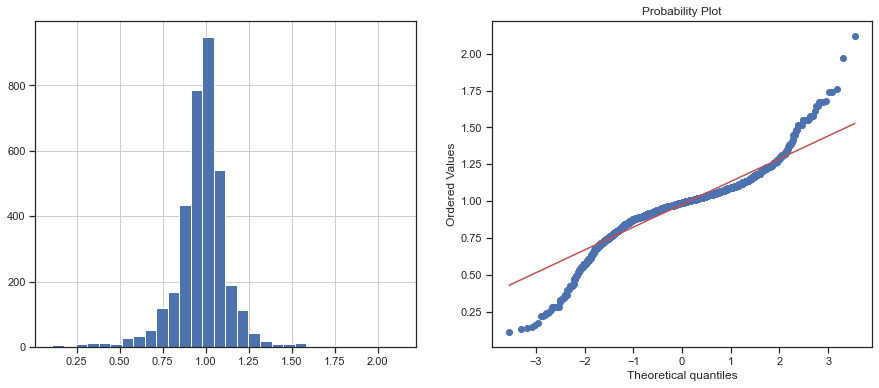

In [37]:
#Квадратный корень
data['HostStarMassSlrMass_sqr'] = data['HostStarMassSlrMass']**(1/2) 
diagnostic_plots(data, 'HostStarMassSlrMass_sqr')

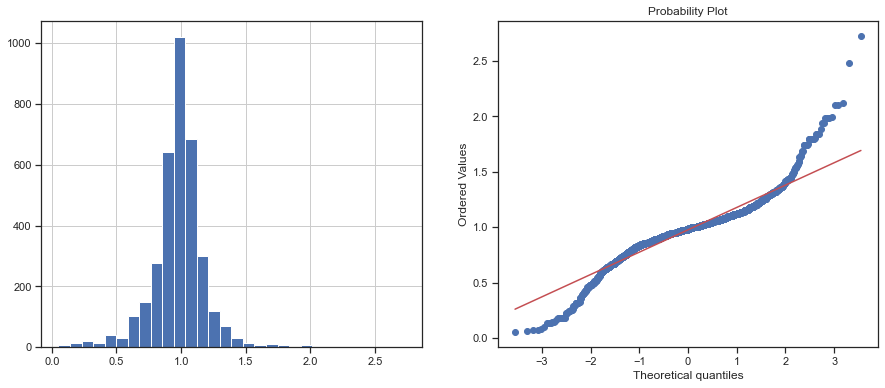

In [38]:
#Возведение в степень
data['HostStarMassSlrMass_exp1'] = data['HostStarMassSlrMass']**(1/1.5)
diagnostic_plots(data, 'HostStarMassSlrMass_exp1')

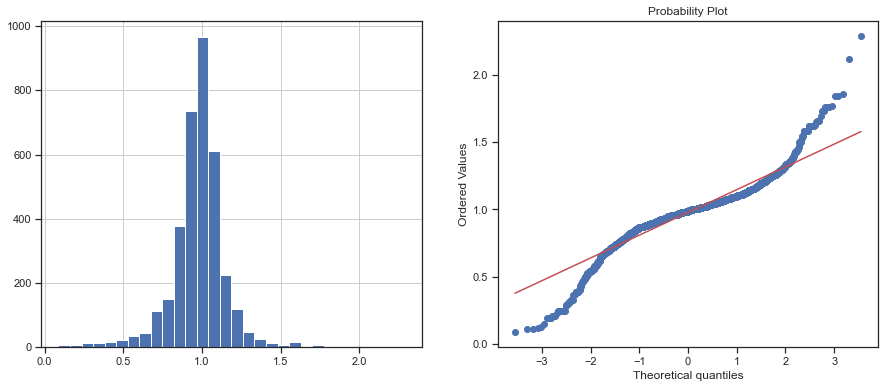

In [39]:
data['HostStarMassSlrMass_exp3'] = data['HostStarMassSlrMass']**(0.55)
diagnostic_plots(data, 'HostStarMassSlrMass_exp3')

Оптимальное значение λ = 0.7231760307645071


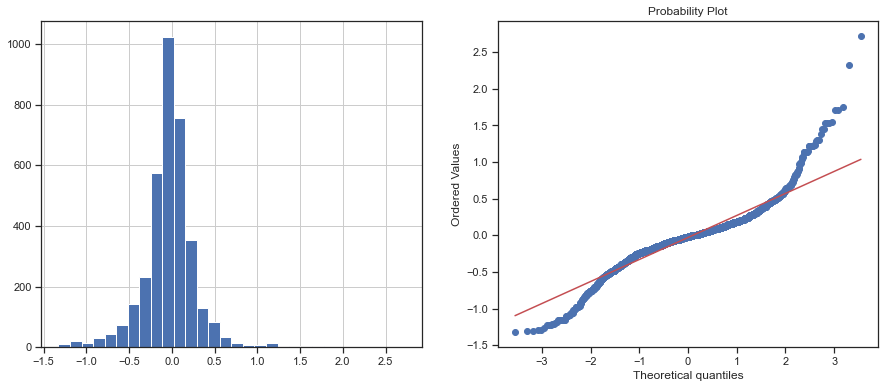

In [40]:
#Преобразование Бокса-Кокса
data['HostStarMassSlrMass_boxcox'], param = stats.boxcox(data['HostStarMassSlrMass']) 
print('Оптимальное значение λ = {}'.format(param))
diagnostic_plots(data, 'HostStarMassSlrMass_boxcox')

Оптимальное значение λ = 0.16838591624404547


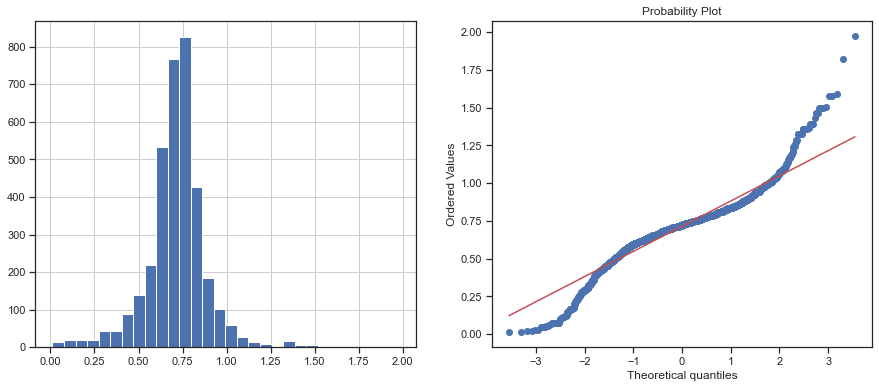

In [41]:
#Преобразование Йео-Джонсона
data['HostStarMassSlrMass_yeojohnson'], param = stats.yeojohnson(data['HostStarMassSlrMass']) 
print('Оптимальное значение λ = {}'.format(param))
diagnostic_plots(data, 'HostStarMassSlrMass_yeojohnson')